In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import numpy as np
import math

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = input_data.read_data_sets('./mnist/data//', one_hot=True)
#from tf.keras.dataset.mnist.load_data()

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data//train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data//train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data//t10k-images-idx3-ubyte.gz
Extracting ./mnist/data//t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

DropOut
  - 학습 시, 전체신경망 중 일부만을 사용하는 것
  
    학습 단계마다 일부 뉴런을 제거하여 일부 특징이 특정 뉴런들에게만 고정되는 것을 막아 가중치의
    균형을 잡도록 하여 과적합을 방지
    
    단, 학습 시에만 적용하고, 실제 예측 시에는 전체신경망을 사용해야 한다.

In [16]:
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)                 

In [17]:
cost = tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y)
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [18]:
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

Minibatch
  - 샘플의 수가 너무 많은 경우에는 한번에 처리하기에는 하드웨어적으로 연산을 하는 속도가 느려질 수 있어
    이에 나눠서 학습을 시키도록 하는 방법

In [19]:
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

print(total_batch)

550


In [20]:
for epoch in range(15):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys, keep_prob: 0.8})    
        total_cost += cost_val
    
    
    print('Epoch:', '%04d' % (epoch + 1), 
          'Avg. cost = ', 
          '{}'.format((np.array(total_cost / total_batch))))

Epoch: 0001 Avg. cost =  [0.4074488  0.42175654 0.42169622 0.44475466 0.44660845 0.44285664
 0.44632038 0.4692737  0.41593516 0.42370862 0.4145917  0.44688985
 0.40686646 0.38492483 0.44857883 0.45105627 0.40637353 0.42175835
 0.4634751  0.45373777 0.40945667 0.39595422 0.37703186 0.41754574
 0.47303694 0.4041922  0.37237433 0.48258817 0.46330094 0.3539503
 0.3828837  0.3485004  0.40435135 0.41780356 0.47710344 0.405792
 0.45877087 0.42688128 0.41619712 0.36885336 0.39581224 0.43085635
 0.39963567 0.41784126 0.38124743 0.4179767  0.39151105 0.47109565
 0.42314434 0.47920245 0.3977521  0.4574014  0.4650848  0.46674627
 0.4226881  0.41845044 0.45594797 0.40524623 0.4595337  0.46135002
 0.4161033  0.37255654 0.45784503 0.37414968 0.41079465 0.47900373
 0.42785227 0.49283636 0.47576126 0.3773641  0.5192967  0.41181338
 0.39950234 0.38409272 0.42342436 0.40777132 0.36784625 0.39655036
 0.38085464 0.41810837 0.4073453  0.4151066  0.42176098 0.41112894
 0.3719669  0.4100604  0.5188356  0.4435

Epoch: 0009 Avg. cost =  [0.02914098 0.03144027 0.03451856 0.04536369 0.04161472 0.05560974
 0.05034228 0.03287307 0.06175669 0.05349905 0.03105707 0.03337504
 0.05221076 0.02901389 0.04610364 0.03801666 0.03921135 0.02737389
 0.03356939 0.05683125 0.04959627 0.03526085 0.04660518 0.06418615
 0.02568137 0.03565722 0.03512614 0.05383981 0.03867033 0.03804981
 0.03803296 0.0541949  0.04988747 0.04300691 0.06095465 0.04795524
 0.03633149 0.04361863 0.04354869 0.06171258 0.04917463 0.04288407
 0.02248271 0.01832331 0.02483479 0.0539258  0.03742718 0.04737276
 0.04345114 0.02251082 0.04345138 0.04039685 0.06193495 0.04406376
 0.02853744 0.05990369 0.05699272 0.03023122 0.03668525 0.02382116
 0.05421913 0.02107079 0.02511645 0.03026499 0.05333136 0.02724531
 0.03240945 0.04390945 0.06124263 0.04419545 0.04847773 0.05148584
 0.03098103 0.05037721 0.03479299 0.06282599 0.02656057 0.05423144
 0.02075356 0.02514239 0.04220192 0.04625835 0.04809324 0.02986193
 0.0361148  0.02950228 0.06260786 0.0

In [21]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))

In [22]:
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [24]:
print(sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels, keep_prob: 1}))

0.9808


과적합을 막는 또다른 방법
 - 배치정규화 (Batch Normalization)
   
   과적합을 막아주면서 동시에 학습 속도도 향상시킴 
   
   tf.nn.batch_normalization / tf.layers.batch_normalization 으로 사용 가능 

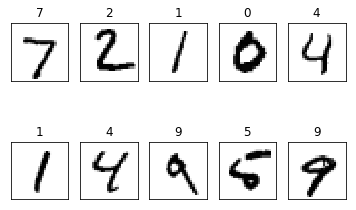

In [29]:
import matplotlib.pyplot as plt

labels = sess.run(model, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1})

fig = plt.figure()

for _ in range(10):
    subplot = fig.add_subplot(2, 5, _+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[_]))
    subplot.imshow(mnist.test.images[_].reshape((28, 28)), cmap=plt.cm.gray_r)

plt.show()
    